### Spell Correction Usecase

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os

In [2]:
# File loading
df  = pd.read_csv('unigram_freq.csv')

In [3]:
df

,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698
...,...,...
333328,gooek,12711
333329,gooddg,12711
333330,gooblle,12711
333331,gollgo,12711


In [4]:
df["word"][:10]

0     the
1      of
2     and
3      to
4       a
5      in
6     for
7      is
8      on
9    that
Name: word, dtype: object

In [5]:
import re

In [6]:
re_special_char = "[^a-z\s]"

In [7]:
def text_preprocessing(word):
    word = str(word)
    #Normalizing the case 
    word = word.lower()
    #Removal of special characters
    word = re.sub(re_special_char,"", word)
    return word

In [8]:
df["word"] = df["word"].apply(text_preprocessing)

In [9]:
df["word"]

0             the
1              of
2             and
3              to
4               a
           ...   
333328      gooek
333329     gooddg
333330    gooblle
333331     gollgo
333332      golgw
Name: word, Length: 333333, dtype: object

In [10]:
# Creating a list of characters -- which indicates each character is a feature
chars = list(" abcdefghijklmnopqrstuvwxyz")

In [11]:
chars

[' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [12]:
# Creating two dictionaries to map characters to token 
char_to_pos = {} #here key is character, value is token
pos_to_char = {} #here key is token, value is character

In [13]:
#Running a for loop to assign tokens to each character
for i,each_char in enumerate(chars):
#     print(i,each_char)
      char_to_pos[each_char] = i
      pos_to_char[i] = each_char

In [14]:
char_to_pos

{' ': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [15]:
pos_to_char

{0: ' ',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [16]:
#getting the total length of characters
count = len(chars)

In [17]:
count

27

In [18]:
chars

[' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [19]:
#SOS -- Start of sentence
#EOS -- End of sentence

#The SOS ("\t") and EOS ("\n") these markers help the model learn when to start and stop generating text. 


sos = "\t"
eos = "\n"

In [20]:
dec_codes = ["\t","\n"]

In [21]:
# In the dict we don't have the tokens for SOS and EOS, so updating the dictionary

# We are adding the SOS and EOS markers separately because they are not part of the main character list used for encoding text.

for each_char in dec_codes:
    char_to_pos[each_char] = count
    pos_to_char[count] = each_char
    count = count+1

In [22]:
print(char_to_pos)

{' ': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '\t': 27, '\n': 28}


In [23]:
print(pos_to_char)

{0: ' ', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 27: '\t', 28: '\n'}


In [24]:
df["word"]

0             the
1              of
2             and
3              to
4               a
           ...   
333328      gooek
333329     gooddg
333330    gooblle
333331     gollgo
333332      golgw
Name: word, Length: 333333, dtype: object

--------------

### Generate the dataset

In [25]:
import random

The `gen_wrong_spell` function is used to generate misspelled versions of words. It takes a word as input and randomly chooses one of three operations to perform:


* Delete a random character from the word.
* Add a random character at a random position in the word.
* Replace a random character in the word with another random character.


The function first generates a random number (rand_val) between 0 and 9. Based on the value of rand_val, it decides which operation to perform. 

If rand_val is less than 3, it deletes a random character from the word. Which indicates we are generating 30% of data with this pattern.

If rand_val is between 3 and 5, it adds a random character at a random position. Which indicates we are generating 30% of data with this pattern.

Otherwise, it replaces a random character with another random character. Which indicates we are generating 40% of data with this pattern.

The function then returns the modified word as the result. This function is used to create a dataset with both correct and incorrect spellings for training a spell checking or correction model.

In [26]:
s = "price"

In [27]:
index1 = random.randrange(0,len(s)+1)

In [28]:
index1

3

In [29]:
char_r = random.choice(chars)

In [30]:
char_r

'h'

In [31]:
s

'price'

In [32]:
s[:index1] + char_r + s[index1+1:] 

'prihe'

In [33]:
#1. delete a random character
def gen_wrong_spell(word):
    rand_val = random.randrange(0,10)
    if rand_val < 3:
        #Delete random character
        #generating random index for deleting random character
        del_index = random.randrange(0,len(word))
        result = word[:del_index]+word[del_index+1:]
    elif rand_val>=3 and rand_val <=5:
        #Add random character
        #generating random index for adding random character
        add_index = random.randrange(0,len(word)+1)
        #chosing randon character from list of chars
        rand_char = random.choice(chars)
        #Adding random character
        result = word[:add_index] + rand_char + word[add_index:]
    else:
        #replace a random character with other
        
        #generating random index for replacing random charact
        replace_index = random.randrange(0,len(word))
        #chosing randon character from list of chars
        rand_char = random.choice(chars)
        result = word[:replace_index] + rand_char + word[replace_index+1:]
    return result

In [34]:
gen_wrong_spell("price")

'pricp'

In [35]:
input_data = []
output_data = []

In [36]:
import tqdm

In [37]:
# Generating input and output data for the model

for each_word in tqdm.tqdm(df["word"]):  # Iterate over each word in the DataFrame column "word"
    rand_val = random.randrange(0,10)  # Generate a random number between 0 and 9
    
    #here are only generating the misspelled words for words with length more than 3
    #60% of the time we are generating misspelled version of the word
    if rand_val < 6 and len(each_word) > 3:  
        wrong_spell = gen_wrong_spell(each_word)  # Generate a misspelled version of the word
        # Append the misspelled word to the input data list
        input_data.append(wrong_spell)  
         # Append the correct word with SOS and EOS markers to the output data list
        output_data.append(sos + each_word + eos) 
    elif len(each_word) > 3:  # If the word length is greater than 3, this is for one to one mapping
        # Append the word to the input data list
        input_data.append(each_word)  
         # Append the word with SOS and EOS markers to the output data list
        output_data.append(sos + each_word + eos) 

100%|██████████████████████████████████████████████████████████████████████| 333333/333333 [00:01<00:00, 204451.96it/s]


In [38]:
input_data

['tha',
 'his',
 'wit',
 'frok',
 'your',
 'havq',
 'gmore',
 'will',
 'hxome',
 'pabout',
 'pag ',
 'serch',
 'free',
 'other',
 'inforkation',
 'kime',
 'tdey',
 'sit',
 'what',
 'whiyh',
 'their',
 'news',
 'tzere',
 'only',
 'when',
 'contct',
 'hre',
 'buiness',
 'klso',
 'help',
 'vfew',
 'ofline',
 'first',
 'been',
 'would',
 'were',
 'services',
 'sole',
 'theze',
 'clik',
 'like',
 'secrvice',
 'than',
 'fcnd',
 'price',
 'datne',
 'ack',
 'peopbe',
 'liwst',
 'name',
 'vust',
 'ovyer',
 'state',
 'yeapr',
 'nto',
 'email',
 'helth',
 'world',
 'next',
 'msed',
 'wyrk',
 'ljast',
 'mlst',
 'producvs',
 'music',
 'datta',
 'makg',
 'thef',
 'should',
 'prduct',
 'sysem',
 'poyt',
 'citb',
 'policy',
 'umber',
 'such',
 'paease',
 'availafble',
 'copyrigkht',
 'support',
 'message',
 'after',
 'beyt',
 'software',
 'zthen',
 'good',
 'video',
 'well',
 'here',
 'info',
 'rghts',
 'tublic',
 'book',
 'high',
 'scpool',
 'trough',
 'gach',
 'links',
 'review',
 'yeas',
 'orde',
 

In [39]:
output_data

['\tthat\n',
 '\tthis\n',
 '\twith\n',
 '\tfrom\n',
 '\tyour\n',
 '\thave\n',
 '\tmore\n',
 '\twill\n',
 '\thome\n',
 '\tabout\n',
 '\tpage\n',
 '\tsearch\n',
 '\tfree\n',
 '\tother\n',
 '\tinformation\n',
 '\ttime\n',
 '\tthey\n',
 '\tsite\n',
 '\twhat\n',
 '\twhich\n',
 '\ttheir\n',
 '\tnews\n',
 '\tthere\n',
 '\tonly\n',
 '\twhen\n',
 '\tcontact\n',
 '\there\n',
 '\tbusiness\n',
 '\talso\n',
 '\thelp\n',
 '\tview\n',
 '\tonline\n',
 '\tfirst\n',
 '\tbeen\n',
 '\twould\n',
 '\twere\n',
 '\tservices\n',
 '\tsome\n',
 '\tthese\n',
 '\tclick\n',
 '\tlike\n',
 '\tservice\n',
 '\tthan\n',
 '\tfind\n',
 '\tprice\n',
 '\tdate\n',
 '\tback\n',
 '\tpeople\n',
 '\tlist\n',
 '\tname\n',
 '\tjust\n',
 '\tover\n',
 '\tstate\n',
 '\tyear\n',
 '\tinto\n',
 '\temail\n',
 '\thealth\n',
 '\tworld\n',
 '\tnext\n',
 '\tused\n',
 '\twork\n',
 '\tlast\n',
 '\tmost\n',
 '\tproducts\n',
 '\tmusic\n',
 '\tdata\n',
 '\tmake\n',
 '\tthem\n',
 '\tshould\n',
 '\tproduct\n',
 '\tsystem\n',
 '\tpost\n',
 '\tcity\n

In [40]:
len(input_data)

319653

In [41]:
#input_data -- encoder
#output_data - decoder

# Determining the maximum length of input and output sequences
max_enc_len = max([len(seq) for seq in input_data])
max_dec_len = max([len(seq) for seq in output_data])

In [42]:
max_enc_len

39

In [43]:
max_dec_len

40

In [44]:
num_samples = len(input_data)

In [45]:
num_samples

319653

In [46]:
len(chars)

27

In [47]:
# Initializing arrays to store encoder and input data

enc_ip_data = np.zeros((num_samples, max_enc_len, len(chars)), dtype = "float32")

In [48]:
enc_ip_data.shape

(319653, 39, 27)

In [49]:
# Initializing arrays to store decoder input


dec_ip_data = np.zeros((num_samples, max_dec_len, len(chars) + 2), dtype = "float32")

In [50]:
dec_ip_data.shape

(319653, 40, 29)

In [51]:
# Initializing arrays to store decoder output data
dec_op_data = np.zeros((num_samples, max_dec_len, len(chars) + 2), dtype = "float32")

In [52]:
dec_op_data.shape

(319653, 40, 29)

In [53]:
for each_row, (input_text, output_text) in enumerate(zip(input_data, output_data)):
    print(each_row)
     # Encoder Input data -- wrong spellings
    for each_col, each_char in enumerate(output_text):
        
        print("Input",each_col,  each_char)
        if each_col > 0:
            print("Output",each_col-1, each_char)
        
    break
        #enc_ip_data[each_row, each_col, char_to_pos[each_char]] =

0
Input 0 	
Input 1 t
Output 0 t
Input 2 h
Output 1 h
Input 3 a
Output 2 a
Input 4 t
Output 3 t
Input 5 

Output 4 



In [54]:
output_text

'\tthat\n'

In [55]:
# Filling the encoder and decoder arrays with the respective positions

for each_row, (input_text, output_text) in enumerate(zip(input_data, output_data)):
    # Encoder Input data -- wrong spellings
    for each_col, each_char in enumerate(input_text):
        enc_ip_data[each_row, each_col, char_to_pos[each_char]] = 1  # Set the position of each character in the input_data to 1

    # Decoder Output/Input data -- correct spellings
    for each_col, each_char in enumerate(output_text):
        dec_ip_data[each_row, each_col, char_to_pos[each_char]] = 1  # Set the position of each character in the output_data to 1
        if each_col > 0:
            dec_op_data[each_row, each_col - 1, char_to_pos[each_char]] = 1  # Set the position of each character in the output_data (except for the first character) to 1

In [56]:
enc_ip_data.shape

(319653, 39, 27)

In [57]:
dec_ip_data.shape

(319653, 40, 29)

In [58]:
enc_ip_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [59]:
dec_ip_data

array([[[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Building the Encoder-decoder architecture

In [60]:
enc_ip_data.shape

(319653, 39, 27)

In [61]:
from tensorflow.keras.models import Model

In [62]:
from tensorflow.keras.layers import LSTM, Dense, Input

### Encoder

In [63]:
## Define the encoder input shape
encode_inputs = Input(shape = (max_enc_len, len(chars)))

In [64]:
encode_inputs.shape

TensorShape([None, 39, 27])

In [65]:
## Define the encoder LSTM layer

encode_lstm = LSTM(kernel_initializer = "random_uniform", return_state = True ,units = 150 )

In [66]:
# Get the encoder LSTM outputs and states

enc_output,state_a,state_c = encode_lstm(encode_inputs) 

In [67]:
# Combine the encoder LSTM states to further feed to decode

encode_states = [state_a, state_c]

In [86]:
encode_states

[<KerasTensor: shape=(None, 150) dtype=float32 (created by layer 'lstm')>,
 <KerasTensor: shape=(None, 150) dtype=float32 (created by layer 'lstm')>]

### Decoder

In [68]:
# Number of tokens in the decoder (characters + SOS + EOS)
num_dec_tokens = len(chars) + 2

In [69]:
num_dec_tokens

29

In [70]:
# # Define the decoder input shape

decoder_inputs = Input(shape = (None,len(chars) + 2))

In [71]:
decoder_inputs.shape

TensorShape([None, None, 29])

In [72]:
## Define the decoder LSTM layer

decoder_lstm = LSTM(kernel_initializer = "random_uniform",return_sequences = True, return_state = True ,units = 150 )

In [73]:
## Define the decoder dense layer for output

decoder_dense = Dense(units = num_dec_tokens, activation = "softmax" )

In [74]:
# Get the decoder LSTM outputs and states
#here the initial_state is the encode_states

decoder_outputs, decoder_state_a, decodet_state_c = decoder_lstm(decoder_inputs, initial_state = encode_states)

In [75]:
decoder_outputs

<KerasTensor: shape=(None, None, 150) dtype=float32 (created by layer 'lstm_1')>

In [77]:
 # Apply the dense layer to the decoder outputs to get the final probabilities
decoder_ouputs = decoder_dense(decoder_outputs)

In [78]:
decoder_ouputs

<KerasTensor: shape=(None, None, 29) dtype=float32 (created by layer 'dense')>

### Combined

In [79]:
#Finally combine encoder and decoder into a single model

model = Model([encode_inputs, decoder_inputs], decoder_ouputs)

In [80]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 39, 27)]     0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 29)]   0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 150),        106800      ['input_1[0][0]']                
                                 (None, 150),                                                     
                                 (None, 150)]                                                     
                                                                                              

In [81]:
# Compile the model with categorical crossentropy loss and adam optimizer

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [82]:
from tensorflow.keras.utils import plot_model

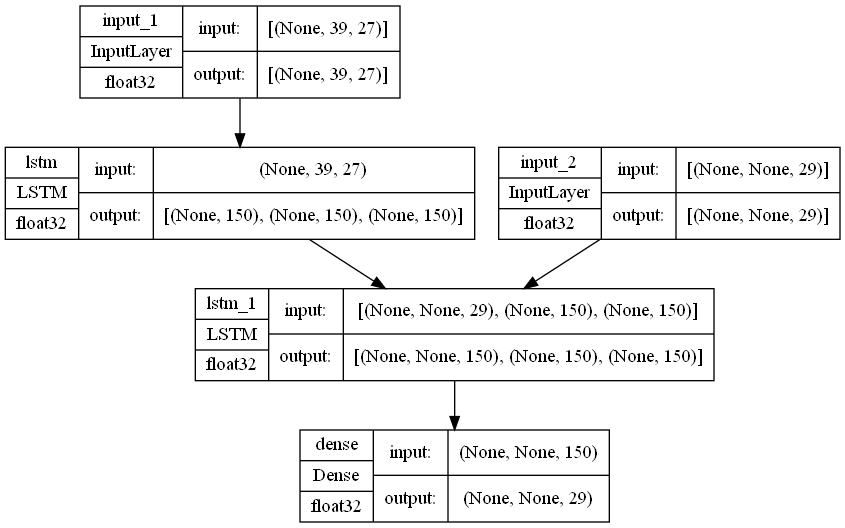

In [83]:
plot_model(model,show_shapes=True,show_dtype=True)

In [ ]:
X = [enc_ip_data,dec_ip_data]
y = dec_op_data

In [ ]:
#Train the model

model.fit(X, y, epochs=20, batch_size = 32)

### Save the model

In [84]:
encode_inputs

<KerasTensor: shape=(None, 39, 27) dtype=float32 (created by layer 'input_1')>

In [85]:
encode_states

[<KerasTensor: shape=(None, 150) dtype=float32 (created by layer 'lstm')>,
 <KerasTensor: shape=(None, 150) dtype=float32 (created by layer 'lstm')>]

In [87]:
# Define the encoder model with encoder inputs and encoder states

enc_model = Model(encode_inputs,encode_states )

In [88]:
enc_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 39, 27)]          0         
                                                                 
 lstm (LSTM)                 [(None, 150),             106800    
                              (None, 150),                       
                              (None, 150)]                       
                                                                 
Total params: 106,800
Trainable params: 106,800
Non-trainable params: 0
_________________________________________________________________


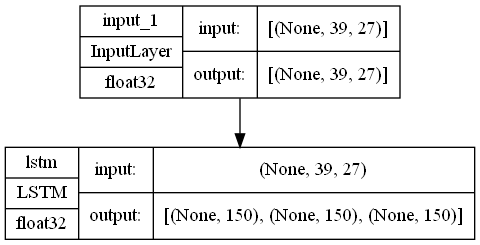

In [89]:
plot_model(enc_model,show_shapes=True,show_dtype=True)

In [90]:
# Define inputs for decoder initial state (for prediction)
enc_state_a = Input(shape = (150,))
enc_state_c = Input(shape = (150,))

############encoder states##################
encode_states_dec = [enc_state_a, enc_state_c]
############encoder states##################


# Define the decoder outputs and states using the decoder LSTM layer

#########Decoder lstm ##############
decoder_outputs, dec_state_a,dec_state_c =  decoder_lstm(decoder_inputs, initial_state = encode_states_dec)
#########Decoder lstm ##############

# Apply the decoder dense layer to the decoder outputs
##############outputs of decoder##########
decoder_states = [dec_state_a,dec_state_c ]
decoder_outputs = decoder_dense(decoder_outputs)
###########################


# Define the decoder model with decoder inputs and decoder states

# Final model
input_decoder = [decoder_inputs, encode_states_dec]
output_decoder = [decoder_outputs, decoder_states]

dec_model = Model(input_decoder, output_decoder)

In [92]:
dec_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, 29)]   0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 150)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 150)]        0           []                               
                                                                                                  
 lstm_1 (LSTM)                  [(None, None, 150),  108000      ['input_2[0][0]',                
                                 (None, 150),                     'input_3[0][0]',          

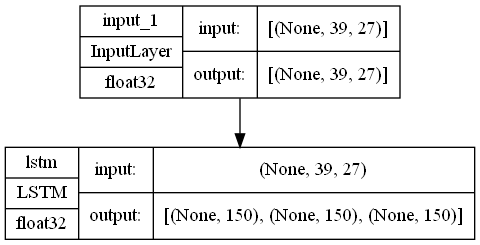

In [94]:
plot_model(enc_model,show_shapes=True,show_dtype=True)

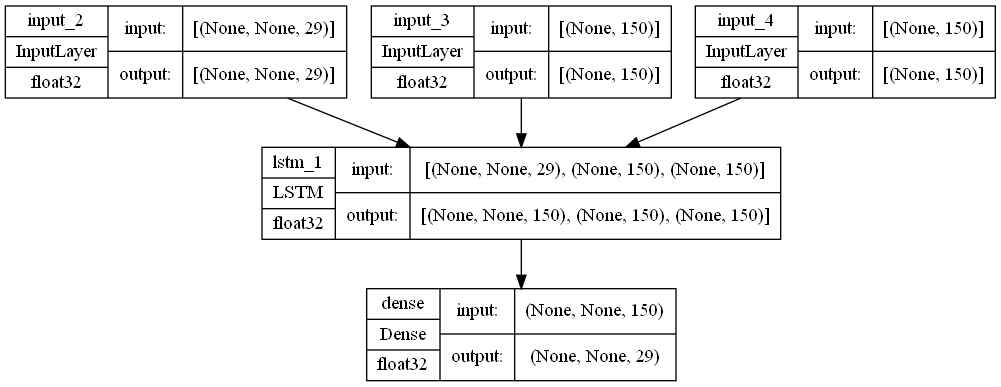

In [93]:
plot_model(dec_model,show_shapes=True,show_dtype=True)

In [ ]:
#enc_model -- encoder model

In [ ]:
#dec_model -- decoder model

In [ ]:
enc_model.save("enc_model_spell.h5")

In [ ]:
dec_model.save("dec_model_spell.h5")